In [58]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import cmcrameri

print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

pandas==2.1.3
numpy==1.26.2
matplotlib==3.8.2
cmcrameri==1.7


In [9]:
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc

In [9]:
N = 9
num_states = 2 ** N

def shift_cmap_and_resample(cmap, num_states, shift=0, low=0, high=1):
    """Shifts a colormap by a certain fraction.

    Keyword arguments:
    cmap -- the colormap to be shifted. Can be a colormap name or a Colormap object
    shift -- the fraction of the colorbar by which to shift (must be between 0 and 1)
    """
    assert -1 <= shift <= 1
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    n = cmap.name
    x = np.linspace(low, high, num_states)
    out = np.roll(x, int(num_states * shift))
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(f'{n}_s', cmap(out))
    new_cmap = new_cmap.resampled(num_states)
    return new_cmap

0 0 (0.149398, 0.049588, 0.249199, 1.0)
1 1 (0.992307, 0.959017, 0.856609, 1.0)
2 2 (0.6280661284121491, 0.013302575932333718, 0.26082276047673975, 1.0)
3 3 (0.919896, 0.838262, 0.918629, 1.0)
4 4 (0.194038, 0.310565, 0.455448, 1.0)
5 5 (0.35201845444059976, 0.7072664359861591, 0.669204152249135, 1.0)
6 0 (0.159969, 0.065016, 0.262778, 1.0)
7 1 (0.982484, 0.940402, 0.830308, 1.0)
8 2 (0.6534409842368321, 0.04144559784698193, 0.2668204536716648, 1.0)
9 3 (0.922991, 0.85071, 0.927975, 1.0)
10 4 (0.170138, 0.297302, 0.443314, 1.0)
11 5 (0.33602460592079997, 0.6894271434063823, 0.6765859284890426, 1.0)
12 0 (0.170456, 0.079947, 0.276266, 1.0)
13 1 (0.972654, 0.921726, 0.804056, 1.0)
14 2 (0.6788158400615149, 0.06958861976163014, 0.2728181468665898, 1.0)
15 3 (0.926008, 0.862872, 0.937103, 1.0)
16 4 (0.14698, 0.282919, 0.42882, 1.0)
17 5 (0.31203383314109956, 0.6626682045367166, 0.6876585928489043, 1.0)
18 0 (0.180717, 0.094578, 0.289575, 1.0)
19 1 (0.962913, 0.902994, 0.777919, 1.0)
20 2 (

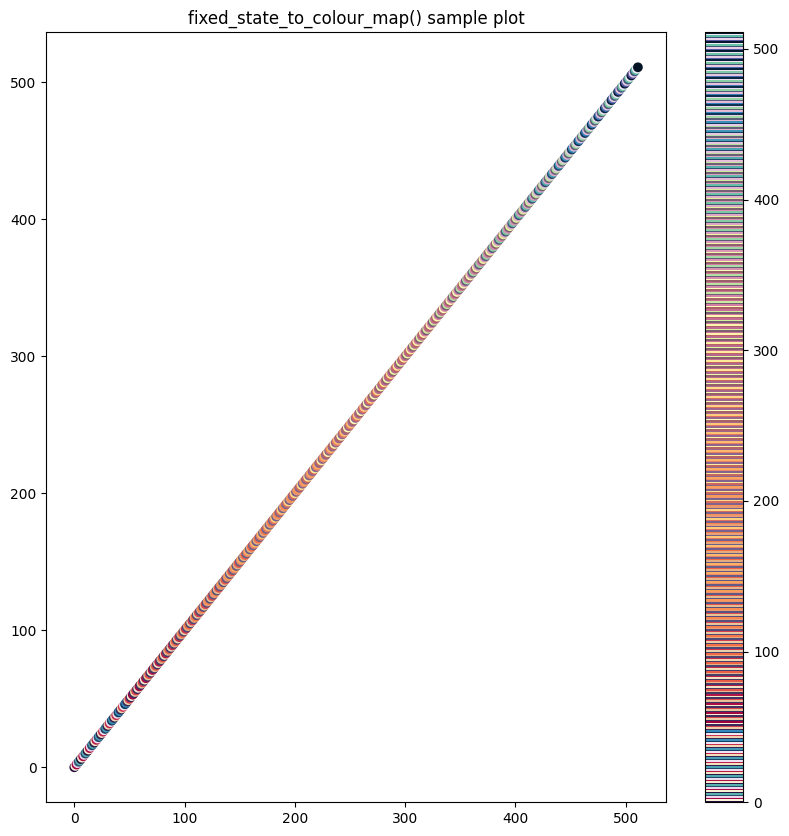

In [63]:

# Version 4: manual matplotlib to not import proplot
'''
deg = -24  # 66 for acton, 30 or 66 for spectral
cstring_a = 'acton'  # Spectral acton
cstring_b = 'Sunrise'  # Spectral Sunset
cstring_c = 'Sunset'  # Spectral Sunset
cmaps = [proplot.Colormap(cstring_a, samples=num_states, shift=0, left=0.10, right=1),
         proplot.Colormap(cstring_b, samples=num_states, shift=0, left=0.00, right=0.9),
         proplot.Colormap(cstring_c, samples=num_states, shift=0, left=0.00, right=0.9),
         proplot.Colormap(cstring_a, samples=num_states, shift=1*deg, left=0.10, right=1),
         proplot.Colormap(cstring_b, samples=num_states, shift=1*deg, left=0.00, right=0.9),
         proplot.Colormap(cstring_c, samples=num_states, shift=1*deg, left=0.00, right=0.9)]'''

shift = 0.1 #-0.0667
cmap_a = cmc.acton  # proplot 'acton'  # Spectral acton
cmap_b = cmc.lipari_r  ## proplot 'sunrise' #cmc.acton ##'Sunrise'  # Spectral Sunset
cmap_c = 'Spectral'  ## proplot 'sunrise' #cmc.acton ##'Sunrise'  # Spectral Sunset

cmaps = [shift_cmap_and_resample(cmap_a, num_states, shift=0, low=0, high=1),
         shift_cmap_and_resample(cmap_b, num_states, shift=0, low=0, high=1),
         shift_cmap_and_resample(cmap_c, num_states, shift=0, low=0, high=1),
         shift_cmap_and_resample(cmap_a, num_states, shift=shift, low=0.1, high=1),
         shift_cmap_and_resample(cmap_b, num_states, shift=shift, low=0, high=0.9),
         shift_cmap_and_resample(cmap_c, num_states, shift=shift, low=0, high=0.9),
         ]


# build cmap, with each consecutive integer alternating amongst the num_cmaps
colour_map = {}
state_labels = list(range(num_states))

num_cmaps = len(cmaps)
for idx, label in enumerate(state_labels):
    cmap_choice = idx % num_cmaps
    colour_map[label] = cmaps[cmap_choice](idx)
    print(idx, cmap_choice, colour_map[label])

custom_mpl_cmap = mpl.colors.ListedColormap([colour_map[i] for i in np.arange(num_states)])

show = True
if show:
    x = np.arange(num_states)
    y = np.arange(num_states)
    fig, ax = plt.subplots(figsize=(10,10))
    sc = plt.scatter(x, y, c=y, cmap=custom_mpl_cmap)
    plt.title('fixed_state_to_colour_map() sample plot')
    plt.colorbar(ax=ax, mappable=sc)
    plt.show()